In [1]:
import imageio
import glob
import cv2

from PIL import Image
import numpy as np
import seaborn as sns

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import importlib
import data_generation
importlib.reload(data_generation)


<module 'data_generation' from '/home/mmenzyns/Repositories/thesis-ai-palm-rejection/data_processing/data_generation.py'>

In [2]:
import numpy as np
arr = np.array([[0, 0], [0, 1]])
arr

array([[0, 0],
       [0, 1]])

In [3]:
# np.where((arr == [0, 0]).all(axis=1))
arr = np.delete(arr, np.where((arr == [0, 0]).all(axis=1)), axis=0) # Remove [0, 0] since it doesn't shift anywhere
arr


array([[0, 1]])

In [4]:
legal = data_generation.read_grayscale_pngs('out/legal')
illegal = data_generation.read_grayscale_pngs('out/illegal')

height=13
width=20

In [5]:
illegal.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
from scipy import ndimage

image = legal[20] 
ax = sns.heatmap(image, vmax=245)


In [ ]:
illegal = data_generation.read_grayscale_pngs('out/illegal')


In [ ]:
image = illegal[1][-110]
ax = sns.heatmap(image, vmax=245)


indices = np.fliplr(np.argwhere(image > 25)).T
ax.scatter(indices[0] + 0.5, indices[1] + 0.5)


# Get edges of values above 25 so a "no-go reactangle" can be created.
x_min = np.min(indices[0])
x_max = np.max(indices[0])

y_min = np.min(indices[1])
y_max = np.max(indices[1])

ax.add_patch(Rectangle((x_min, y_min), x_max - x_min + 1, y_max - y_min + 1, facecolor='None', edgecolor='lightblue'))

x_min, x_max, y_min, y_max

range_of_movement = {
    '+x': width - x_max - 2     if x_min > 0 and x_max < width-1    else 0,
    '-x': x_min - 1             if x_min > 0 and x_max < width-1    else 0,
    '+y': height - y_max - 2    if y_min > 0 and y_max < height-1   else 0,
    '-y': y_min - 1             if y_min > 0 and y_max < height-1   else 0,
}

plt.savefig('data_generation_rectangle.pdf')

In [ ]:
import importlib
importlib.reload(data_generation)

illegal = data_generation.read_grayscale_pngs('out/illegal')
for img in illegal:
    shift_range = data_generation.get_movement_range(img)
    print(shift_range)
    images = data_generation.generate_from_movement_range(img, shift_range)
    for j, shifted_image in enumerate(images):
        print(j)
    break


In [ ]:
# Create arrays for range of movements
x = list(range(-1, -range_of_movement['-x']-1, -1)) + list(range(range_of_movement['+x']+1))
y = list(range(-1, -range_of_movement['-y']-1, -1)) + list(range(range_of_movement['+y']+1))

arr = np.dstack(np.meshgrid(x, y)).reshape(-1, 2) # Make a cartesian product of those two arrays
arr = np.delete(arr, np.where(arr == [0, 0]), axis=0) # Remove [0, 0] since it doesn't shift anywhere

plt.figure()
sns.heatmap(image)

images = []

movement = arr[0]
print(movement)
plt.figure()
median_value = np.median(image)
sns.heatmap(ndimage.shift(image, np.array([movement[1], movement[0]]), cval=median_value))


In [ ]:
import data_generation
movement_range = data_generation.get_movement_range(image)
images = data_generation.generate_from_movement_range(image, movement_range)

for im in images:
    plt.figure()
    ax = sns.heatmap(im, vmax=245)


In [ ]:
illegal = read_grayscale_pngs('out/illegal')

for i, img in enumerate(illegal):
    shift_range = data_generation.get_movement_range(img)
    images = data_generation.generate_from_movement_range(img, shift_range)
    print(np.shape(images))
    # for j, shifted_image in enumerate(images):
    #     plt.imsave('shifted/illegal/{}_{}.png'.format(i,j), shifted_image, cmap='gray', vmin=-10, vmax=245)

In [ ]:
x_max

In [ ]:
range_of_movement = {
    '+x': 3,
    '-x': 2,
    '+y': 0,
    '-y': 8
}
import numpy as np
# for i in range(range_of_movement['+x']):
#     for j in range(range_of_movement['+y']):
#         print(i+1, j+1)
#     for j in range(range_of_movement['-y']):
#         print(i+1, -j-1)

# for i in range(range_of_movement['-x']):
#     for j in range(range_of_movement['+y']):
#         print(i+1, j+1)
#     for j in range(range_of_movement['-y']):
#         print(i+1, -j-1)

In [ ]:
# Create arrays for range of movem
x = list(range(-1, -range_of_movement['-x']-1, -1)) + list(range(range_of_movement['+x']+1))
y = list(range(-1, -range_of_movement['-y']-1, -1)) + list(range(range_of_movement['+y']+1))

In [ ]:
arr = np.dstack(np.meshgrid(x, y)).reshape(-1, 2) # Make a cartesian product of those two arrays
arr = np.delete(arr, np.where(arr == [0, 0]), axis=0) # Remove [0, 0] since it doesn't shift anywhere

<AxesSubplot:>

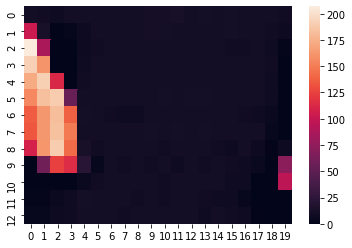

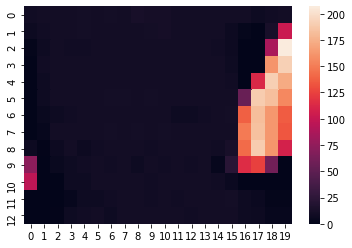

In [27]:
images = illegal[1][0:10]

mirrored = np.flip(images, axis=2)

sns.heatmap(images[0])
plt.figure()
sns.heatmap(mirrored[0])

<AxesSubplot:>

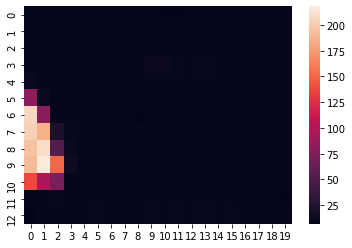

In [28]:
sns.heatmap(image)

<AxesSubplot:>

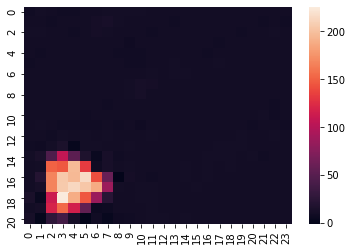

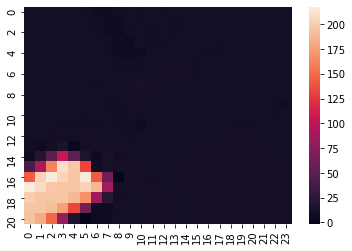

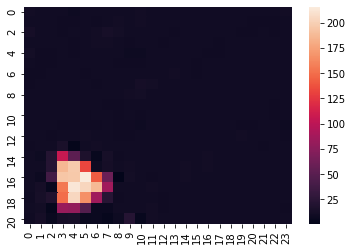

In [44]:
angle = 30

sns.heatmap(ndimage.rotate(image, angle, mode='reflect'))
plt.figure()
sns.heatmap(ndimage.rotate(image, angle, mode='nearest')) # BEST
plt.figure()
sns.heatmap(ndimage.rotate(image, angle, mode='mirror'))

<AxesSubplot:>

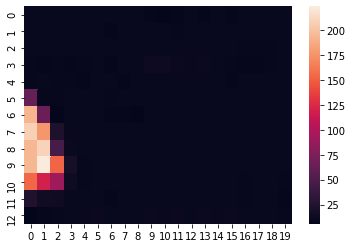